In [11]:
# Import Dependencies
import pandas as pd
import numpy as np
import math 
from math import log
import datetime as dt
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
from datetime import datetime
import requests
import pandas_datareader as pdr
from datetime import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline
warnings.filterwarnings('ignore')

In [12]:
# Function to Validate Tickers
def validateTick(tick):
    
    # Try Inputting into Yahoo Stocks
    try:
        pdr.DataReader(f'{tick}','yahoo',date)
    
    # Raise Error if Invalid
    except:
        raise ValueError("Ticker Not Valid.")
        
# Function to Validate Date
def validate(date_text):
    
    # Try Check on Format
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
        
    # Raise Error if Invalid
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")
        
# Function to Validate Date
def validateShift(shift):
    shift = int(shift)
    # Try Check on Format
    try:
        if 0 > shift <= 365:
            pass
        
    # Raise Error if Invalid
    except ValueError:
        raise ValueError("Please enter a whole number.")

In [13]:
# Pick a Start Date
date = input("Pick a start date for your analysis (YYYY-MM-DD): ")

# Validate Correct Date Format
validate(date)

Pick a start date for your analysis (YYYY-MM-DD):  2016-01-01


In [14]:
# Pick a Stock
stock_selection = input("Pick a stock ticker for your analysis: ")

# Validate Correct Date Format
validateTick(stock_selection)

Pick a stock ticker for your analysis:  CME


In [15]:
# Pick Shift
shift_selection = input("Pick how many days to shift your close values for your analysis: ")

# Validate Correct Date Format
validateShift(shift_selection)

Pick how many days to shift your close values for your analysis:  1


In [48]:
# Function to Create Stocks
def stockCreation(date, stock_selection, days_shifted):
    
    # Read Stock Data
    globals()[stock_selection] = pdr.DataReader(f'{stock_selection}','yahoo',date)
    
    # Create Shifted Close Column
    globals()[stock_selection]["Shifted Close"] = globals()[stock_selection]["Adj Close"].shift(-int(days_shifted))
    
    # Drop Rows Without Shift Values
    globals()[stock_selection].drop(globals()[stock_selection].tail(int(days_shifted)).index, inplace = True) 
    
    # Empty List to Hold Profit or Loss
    profit_loss = []
    
    # Iterate Through DataFrame
    for x in range(len(globals()[stock_selection])):
        
        # Handle Profitable Days
        if globals()[stock_selection]["Shifted Close"][x] > globals()[stock_selection]["Adj Close"][x]:
            
            # Append "Profit" to Empty List
            profit_loss.append(1)
            
        # Handle Loss Days
        elif globals()[stock_selection]["Shifted Close"][x] < globals()[stock_selection]["Adj Close"][x]:
            
            # Append "Loss" to Empty List
            profit_loss.append(-1)
            
        # Handle Push Days
        elif globals()[stock_selection]["Shifted Close"][x] == globals()[stock_selection]["Adj Close"][x]:
            
            # Append "Push" to Empty List
            profit_loss.append(1)
    
    # Create Profit/Loss Column
    globals()[stock_selection]["Profit/Loss"] = profit_loss
    
    # Create Returns Column
    globals()[stock_selection]['Returns'] = np.log(globals()[stock_selection]['Adj Close'] / globals()[stock_selection]['Adj Close'].shift(1))
    
    # Iterate to Create STD Columns
    for x in range(5, 20, 5):
        
        # Create STD Column Based on Iteration
        col_name = 'std_' + str(x)
        
        # Add STD Column to DataFrame
        globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'].rolling(window=x).std()

    # Iterate to Create MA Columns
    for x in range(10, 30, 5):
        
        # Create MA Column Based on Iteration
        col_name = 'ma_' + str(x)
        
        # Add MA Column to DataFrame
        globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'].rolling(window=x).mean()

    # Iterate to Create % Change Columns
    for x in range(3, 12, 3):
        
        # Create % Change Column Based on Iteration
        col_name = 'pct_' + str(x)
        
        # Add % Change Column to DataFrame
        globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'].pct_change().rolling(window=x).sum()

    # Create VMA 4 Column
    col_name = 'vma_4'
    
    # Add VMA 4 Column to DataFrame
    globals()[stock_selection][col_name] = globals()[stock_selection]['Volume'].rolling(4).mean()

    # Create Intraday Column
    col_name = 'co'
    
    # Add Intraday Column to DataFrame
    globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'] - globals()[stock_selection]['Open']
    
    # Drop All NaN's
    globals()[stock_selection].dropna(inplace=True)
    
    # Return DataFrame
    return globals()[stock_selection]

In [49]:
# Create Stock
stockCreation(date, stock_selection, shift_selection)

,High,Low,Open,Close,Volume,Adj Close,Shifted Close,Profit/Loss,Returns,std_5,...,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-08,90.669998,87.000000,88.410004,90.190002,2758100.0,75.330887,77.936836,1,0.018351,1.218740,...,2.022289,73.756442,72.653080,72.354897,72.608648,0.009896,0.004898,0.044908,2910525.0,-13.079117
2016-02-09,93.809998,89.050003,89.050003,93.309998,3233500.0,77.936836,75.614868,-1,0.034008,2.126921,...,2.423534,74.336102,73.053999,72.620506,72.763668,0.078829,0.044054,0.075449,3200800.0,-11.113167
2016-02-10,93.489998,90.440002,93.029999,90.529999,2133700.0,75.614868,74.604225,-1,-0.030246,2.154174,...,2.382844,74.654331,73.406474,72.757486,72.802423,0.023321,0.017951,0.041389,2785025.0,-17.415131
2016-02-11,90.550003,88.320000,88.360001,89.320000,1952800.0,74.604225,76.132721,1,-0.013456,1.512457,...,1.967143,74.840592,73.814632,72.972562,72.815453,-0.008565,0.001331,-0.003668,2519525.0,-13.755775
2016-02-12,91.290001,89.510002,90.919998,91.150002,1691200.0,76.132721,75.765213,-1,0.020281,1.253418,...,1.863000,74.949174,74.169889,73.241928,72.936396,-0.022671,0.056159,0.021383,2252800.0,-14.787277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-10,192.190002,182.660004,191.119995,185.199997,2688300.0,185.199997,182.710007,-1,-0.035903,3.217443,...,4.666078,188.948001,187.108666,188.628500,190.594800,-0.032238,-0.035378,0.016366,2131775.0,-5.919998
2021-02-11,186.289993,179.690002,185.759995,182.710007,2515000.0,182.710007,184.369995,1,-0.013536,4.337415,...,4.799721,188.972002,186.876000,187.866500,190.168000,-0.047511,-0.048719,0.006921,2325175.0,-3.049988
2021-02-12,184.589996,182.110001,182.860001,184.369995,1441400.0,184.369995,189.410004,1,0.009044,4.345501,...,4.786531,189.235001,186.898000,187.378000,189.590400,-0.039625,-0.047655,-0.015357,2167750.0,1.509995


In [50]:
# Assign Y Values
y = stockCreation(date, stock_selection, shift_selection)["Profit/Loss"]

In [51]:
# Assign X Values
X = stockCreation(date, stock_selection, shift_selection).drop(["Shifted Close", "Profit/Loss"], axis=1)

In [52]:
X.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,std_5,std_10,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co
Date,,,,,,,,,,,,,,,,,,,
2016-02-08,90.669998,87.000000,88.410004,90.190002,2758100.0,75.330887,0.018351,1.218740,1.268820,2.022289,73.756442,72.653080,72.354897,72.608648,0.009896,0.004898,0.044908,2910525.0,-13.079117
2016-02-09,93.809998,89.050003,89.050003,93.309998,3233500.0,77.936836,0.034008,2.126921,1.699434,2.423534,74.336102,73.053999,72.620506,72.763668,0.078829,0.044054,0.075449,3200800.0,-11.113167
2016-02-10,93.489998,90.440002,93.029999,90.529999,2133700.0,75.614868,-0.030246,2.154174,1.598326,2.382844,74.654331,73.406474,72.757486,72.802423,0.023321,0.017951,0.041389,2785025.0,-17.415131
2016-02-11,90.550003,88.320000,88.360001,89.320000,1952800.0,74.604225,-0.013456,1.512457,1.452542,1.967143,74.840592,73.814632,72.972562,72.815453,-0.008565,0.001331,-0.003668,2519525.0,-13.755775
2016-02-12,91.290001,89.510002,90.919998,91.150002,1691200.0,76.132721,0.020281,1.253418,1.509159,1.863000,74.949174,74.169889,73.241928,72.936396,-0.022671,0.056159,0.021383,2252800.0,-14.787277


In [53]:
y.head()

Date
2016-02-08    1
2016-02-09   -1
2016-02-10   -1
2016-02-11    1
2016-02-12   -1
Name: Profit/Loss, dtype: int64

[0.05037017 0.05010413 0.04997652 0.05035159 0.05732503 0.05011702
 0.06213791 0.0584897  0.05650613 0.05319237 0.04528167 0.04419716
 0.04429511 0.04693683 0.05557506 0.05727908 0.05444711 0.05485128
 0.05856612]


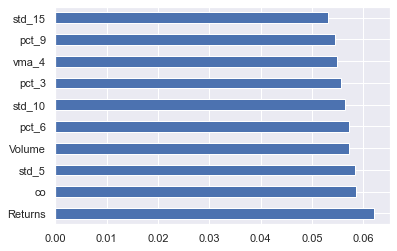

In [54]:
#determining the best features for "X"
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [101]:
#data fram for "X" with targeted features
X = CME[["Returns", "co", "std_5", "Volume", "pct_6", "std_10"]]

In [102]:
X.head()

,Returns,co,std_5,Volume,pct_6,std_10
Date,,,,,,
2016-02-08,0.018351,-13.079117,1.218740,2758100.0,0.004898,1.268820
2016-02-09,0.034008,-11.113167,2.126921,3233500.0,0.044054,1.699434
2016-02-10,-0.030246,-17.415131,2.154174,2133700.0,0.017951,1.598326
2016-02-11,-0.013456,-13.755775,1.512457,1952800.0,0.001331,1.452542
2016-02-12,0.020281,-14.787277,1.253418,1691200.0,0.056159,1.509159


In [103]:
# Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [104]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
# create gradient boosting model with tuning
model = GradientBoostingClassifier(learning_rate=0.1, 
                                   max_depth=2,
                                   max_features=4,
                                   min_impurity_split=1e-07, 
                                   min_samples_leaf=1,
                                   min_samples_split=0.99, 
                                   n_estimators=20, 
                                   )

# train model
model.fit(X_train_scaled, y_train)

# make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

# accuracy
print("Model train accuracy:", accuracy_score(y_train, y_pred_train))
print("Model test accuracy:", accuracy_score(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))

Model train accuracy: 0.5763962065331928
Model test accuracy: 0.5173501577287066
              precision    recall  f1-score   support

          -1       0.58      0.05      0.08       155
           1       0.51      0.97      0.67       162

    accuracy                           0.52       317
   macro avg       0.55      0.51      0.38       317
weighted avg       0.55      0.52      0.38       317



In [106]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5140183193946635

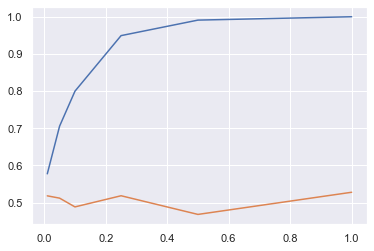

In [116]:
#tuning the learning rates
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(learning_rates, train_results)
line2 = plt.plot(learning_rates, test_results)
                  

plt.show()

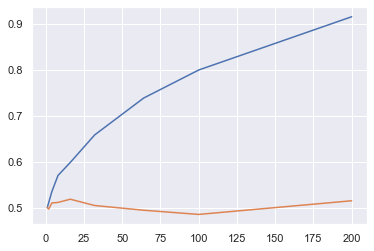

In [117]:
#tuning the number of estimators 
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results)
line2, = plt.plot(n_estimators, test_results)


plt.show()


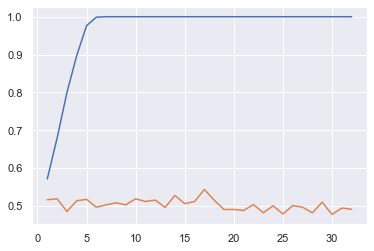

In [118]:
#tuning the max depth 
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results)
line2, = plt.plot(max_depths, test_results)

plt.show()

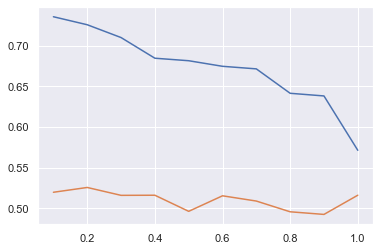

In [119]:
#tuning the sample splits 
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results)
line2, = plt.plot(min_samples_splits, test_results)

plt.show()

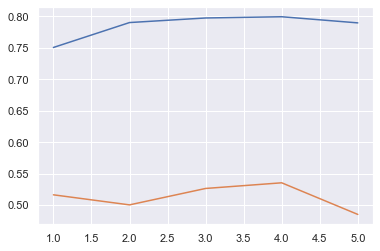

In [120]:
#tuning the max number of features 
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results)
line2, = plt.plot(max_features, test_results)

plt.show()